Nhãn: Abuse
Extracted 19 segments from dataset/Test\Abuse\Abuse028_x264.mp4, each with 5 frames.
Extracted 21 segments from dataset/Test\Abuse\Abuse030_x264.mp4, each with 5 frames.
Nhãn: Arrest
Extracted 32 segments from dataset/Test\Arrest\Arrest001_x264.mp4, each with 5 frames.
Extracted 42 segments from dataset/Test\Arrest\Arrest007_x264.mp4, each with 5 frames.
Extracted 49 segments from dataset/Test\Arrest\Arrest024_x264.mp4, each with 5 frames.
Extracted 116 segments from dataset/Test\Arrest\Arrest030_x264.mp4, each with 5 frames.
Extracted 212 segments from dataset/Test\Arrest\Arrest039_x264.mp4, each with 5 frames.
Nhãn: Arson
Extracted 84 segments from dataset/Test\Arson\Arson007_x264.mp4, each with 5 frames.
Extracted 10 segments from dataset/Test\Arson\Arson009_x264.mp4, each with 5 frames.
Extracted 43 segments from dataset/Test\Arson\Arson010_x264.mp4, each with 5 frames.
Extracted 17 segments from dataset/Test\Arson\Arson011_x264.mp4, each with 5 frames.
Extracted 24 seg

Testing loss 4.7792 acc 0.4380: 100%|██████████| 205/205 [01:22<00:00,  2.48batch/s]


Độ chính xác cao nhất: 0.4380
Test Loss: 4.7792 | Test Accuracy: 0.4380
Number of test samples: 13084
Number of correct predictions: 5731
Number of wrong predictions: 7353
Classification Report:
               precision    recall  f1-score   support

        Abuse     0.0403    1.0000    0.0775        40
       Arrest     0.0057    0.0044    0.0050       451
        Arson     0.0690    0.0318    0.0436       377
      Assault     0.0309    0.0141    0.0193       355
     Burglary     0.1257    0.0691    0.0892      1027
    Explosion     0.1613    0.0171    0.0309       878
     Fighting     0.0000    0.0000    0.0000       166
       Normal     0.6677    0.8115    0.7326      6843
RoadAccidents     0.0128    0.0164    0.0144       366
      Robbery     0.0170    0.0708    0.0274       113
     Shooting     0.0652    0.0029    0.0056      1026
  Shoplifting     0.0173    0.0039    0.0064      1026
     Stealing     0.0067    0.0263    0.0107       266
    Vandalism     0.0515    0.0333

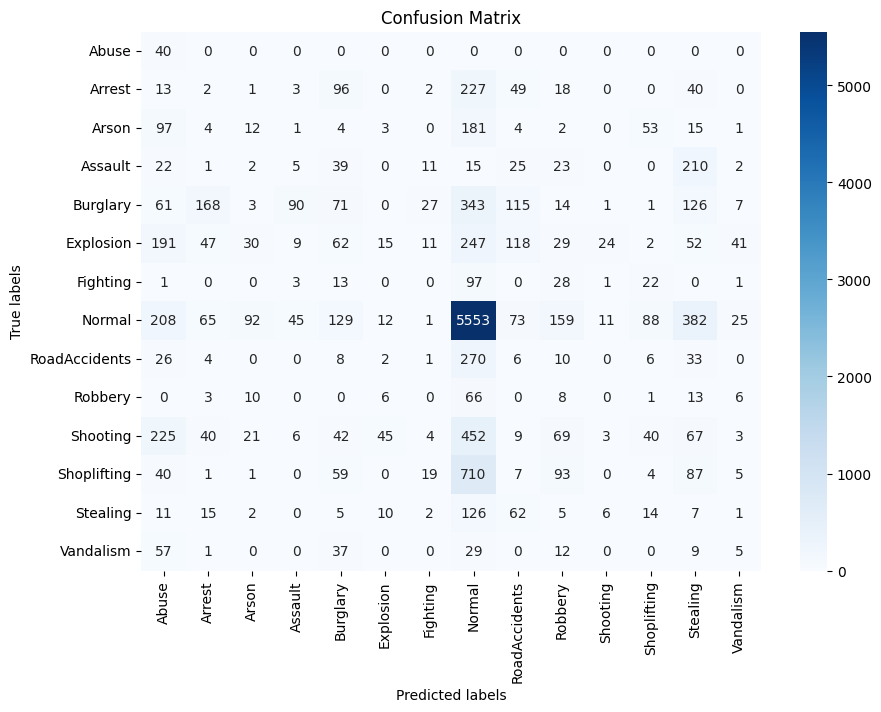

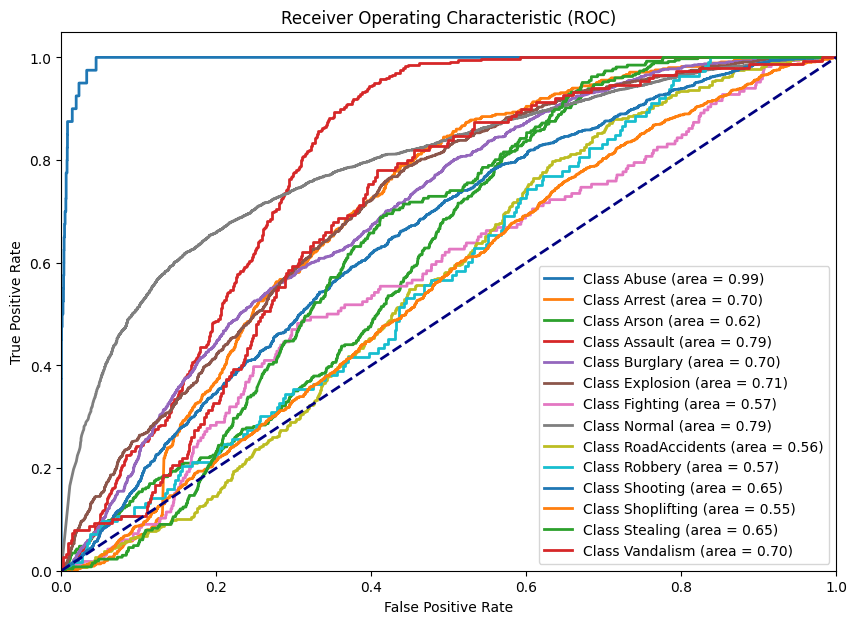

In [ ]:
#%%

import os
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
import torch
import numpy as np
from models import ModelResNet18SingleFrame
from models import ModelResNet18LateFrame
from models import ModelResNet18EarlyFrame
from models import ModelResNet18CNN_LSTM
from models import S3D
from dataset import create_dataset
from dataset import create_test_dataset
from dataset import CrimeDataset
from keras.utils import to_categorical
from test_model import test_model
from test_model import evaluate_precision_recall_f1
from test_model import plot_confusion_matrix
from test_model import plot_roc_curve

SEED = 24
EPOCHS = 15
BATCH_SIZE = 64
CLASSES_LIST = ["Abuse", "Arrest", "Arson", "Assault", "Burglary", "Explosion", "Fighting", "Normal",  "RoadAccidents", "Robbery", "Shooting", "Shoplifting", "Stealing", "Vandalism"]
IMAGE_HEIGHT , IMAGE_WIDTH = 100, 100
NUM_CLASSES = 14
LEARNING_RATE = 1e-3
# labels = to_categorical(labels, num_classes=NUM_CLASSES)
test_features, test_labels, test_video_files_paths = create_test_dataset()

# Transformations (if any)
transform = transforms.Compose([
    transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),
    transforms.ToTensor(),
])

dataset = CrimeDataset(test_features, test_labels, transform=transform)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
print(f"Number of test samples: {len(dataset)}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ModelResNet18EarlyFrame(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load('models/model_resnet18_2D_CNN_earlyframe2.pth'))
criterion = nn.CrossEntropyLoss()
# Test the model
test_loss, test_acc, all_preds, all_probs, all_labels, history = test_model(model, test_loader, criterion,device=device)

# Evaluate metrics
evaluate_precision_recall_f1(all_preds, all_labels, CLASSES_LIST)
plot_confusion_matrix(all_labels, all_preds, CLASSES_LIST)
plot_roc_curve(all_labels, all_probs, CLASSES_LIST)